#### Sr. Engineer: Dhruv Singh <br> Course Name: EDHEC Portfolio Optimization <br> Lesson Name: Efficient Frontier, Part 1 <br> Date Updated: 01/09/2022

# The Efficient Frontier - Part I

In [1]:
import pandas as pd
ind = pd.read_csv("data/etf_data.csv", header=0, index_col=0, parse_dates=True).pct_change()
ind = ind.dropna()
ind.index = pd.to_datetime(ind.index, format="%Y%m").to_period('M')

In [2]:
ind.head()

,QQQ,IWF,VOO,SPY
Date,,,,
2010-11,-0.001725,0.011319,-0.001108,0.000000
2010-12,0.045498,0.050642,0.064337,0.061271
2011-01,0.028278,0.024275,0.022234,0.023300
2011-02,0.031607,0.034271,0.034664,0.034737
2011-03,-0.005885,-0.003132,-0.004434,-0.004206


In [3]:
ind.columns

Index(['QQQ', 'IWF', 'VOO', 'SPY'], dtype='object')

In [4]:
# cleaning column names
ind.columns = ind.columns.str.strip()

In [5]:
ind.shape

(134, 4)

In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import edhec_risk_kit_107 as erk
ind = erk.get_ind_returns()
ind.shape

(135, 4)

<AxesSubplot:xlabel='Date'>

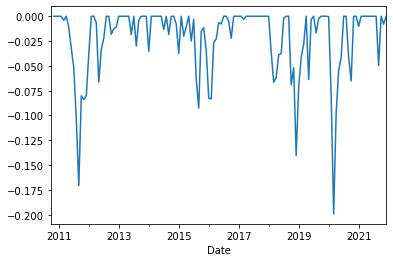

In [7]:
erk.drawdown(ind["SPY"])["Drawdown"].plot.line()

In [8]:
erk.var_gaussian(ind[["QQQ", "IWF", "VOO", "SPY"]], modified=True)

QQQ    0.056614
IWF    0.053525
VOO    0.054933
SPY    0.055068
dtype: float64

<AxesSubplot:>

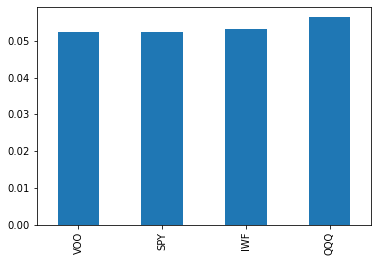

In [9]:
# checking variance
erk.var_gaussian(ind).sort_values().plot.bar()

In [10]:
# computing sharpe ratio
erk.sharpe_ratio(ind, 0.03, 12).sort_values()

SPY    0.729912
VOO    0.734796
IWF    0.936421
QQQ    1.065665
dtype: float64

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios 2010-2021'}>

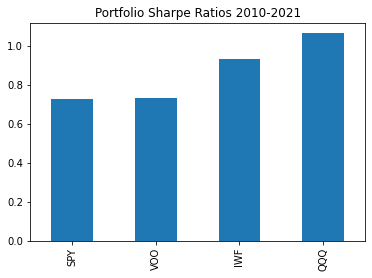

In [11]:
erk.sharpe_ratio(ind, 0.03, 12).sort_values().plot.bar(title="Portfolio Sharpe Ratios 2010-2021")

<AxesSubplot:title={'center':'Portfolio Sharpe Ratios since 2013'}>

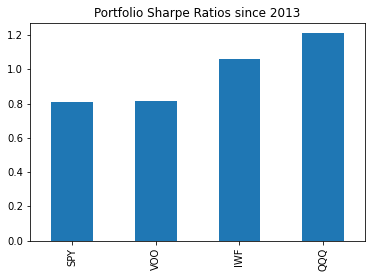

In [12]:
erk.sharpe_ratio(ind["2013":], 0.03, 12).sort_values().plot.bar(title='Portfolio Sharpe Ratios since 2013')

## Expected Returns and the Covariance Matrix

In [13]:
# generating expected returns (naively) based on historic returns
# for 5 year period
er = erk.annualize_rets(ind["2011":"2016"], 12)

<AxesSubplot:>

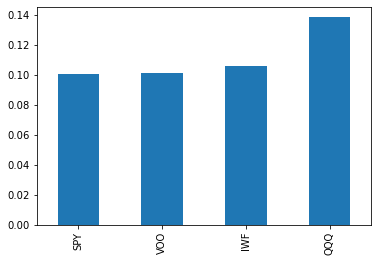

In [14]:
er.sort_values().plot.bar()

Finally, let's generate the covariance matrix. Fortunately, this is easy enough to do using the `.cov` method:

In [15]:
# covariance matrix
cov = ind["2011":"2016"].cov()
cov.shape

(4, 4)